<h1 id="title" style="color:white;background:black;">
    </br>
    <center>
        [TPS - June 2021] Basic EDA
    </center>
</h1>

[[TPS-May] Categorical EDA](https://www.kaggle.com/subinium/tps-may-categorical-eda) inspired me and this notebook has just previous default setting applied.

If you like this, check out the original notebook as well.

# Import Libraries 📚

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Default Setting

- https://www.kaggle.com/subinium/dark-mode-visualization-apple-version

In [2]:
from cycler import cycler


raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]


light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255

mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]

white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

mpl.rcParams['figure.dpi'] = 200

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [3]:
def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

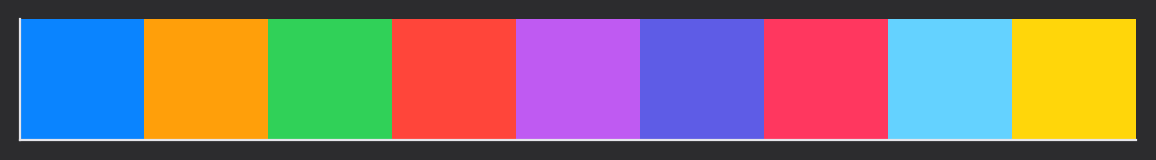

In [4]:
custom_palette(dark_palette)

# Reading the csv📚

In [5]:
train = pd.read_csv('../input/tabular-playground-series-may-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-may-2021/test.csv')
submission = pd.read_csv('../input/tabular-playground-series-may-2021/sample_submission.csv')

In [6]:
display(train.head())
display(test.head())
display(submission.head())

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,...,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,...,1,0,0,0,0,0,0,0,0,0


,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25


# General Info.🃏

## Check Train & Test shape

In [7]:
print('Rows and Columns in train dataset:', train.shape)
print('Rows and Columns in test dataset:', test.shape)

Rows and Columns in train dataset: (100000, 52)
Rows and Columns in test dataset: (50000, 51)


## Missing values

In [8]:
display(sum(train.isnull().sum()))
display(sum(test.isnull().sum()))

0

0

# Basic EDA 🏕️

In [9]:
train.columns

Index(['id', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'target'],
      dtype='object')

In [10]:
feature = []
for i in train.columns:
    if 'feature' in i:
        print(i)
        feature.append(i)

feature_0
feature_1
feature_2
feature_3
feature_4
feature_5
feature_6
feature_7
feature_8
feature_9
feature_10
feature_11
feature_12
feature_13
feature_14
feature_15
feature_16
feature_17
feature_18
feature_19
feature_20
feature_21
feature_22
feature_23
feature_24
feature_25
feature_26
feature_27
feature_28
feature_29
feature_30
feature_31
feature_32
feature_33
feature_34
feature_35
feature_36
feature_37
feature_38
feature_39
feature_40
feature_41
feature_42
feature_43
feature_44
feature_45
feature_46
feature_47
feature_48
feature_49


In [11]:
feature

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49']

In [12]:
train.columns

Index(['id', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'target'],
      dtype='object')

In [13]:
label = [target for target in sample_submission.columns if 'Class' in target]

NameError: name 'sample_submission' is not defined

In [14]:
label

NameError: name 'label' is not defined

## Target Distribution

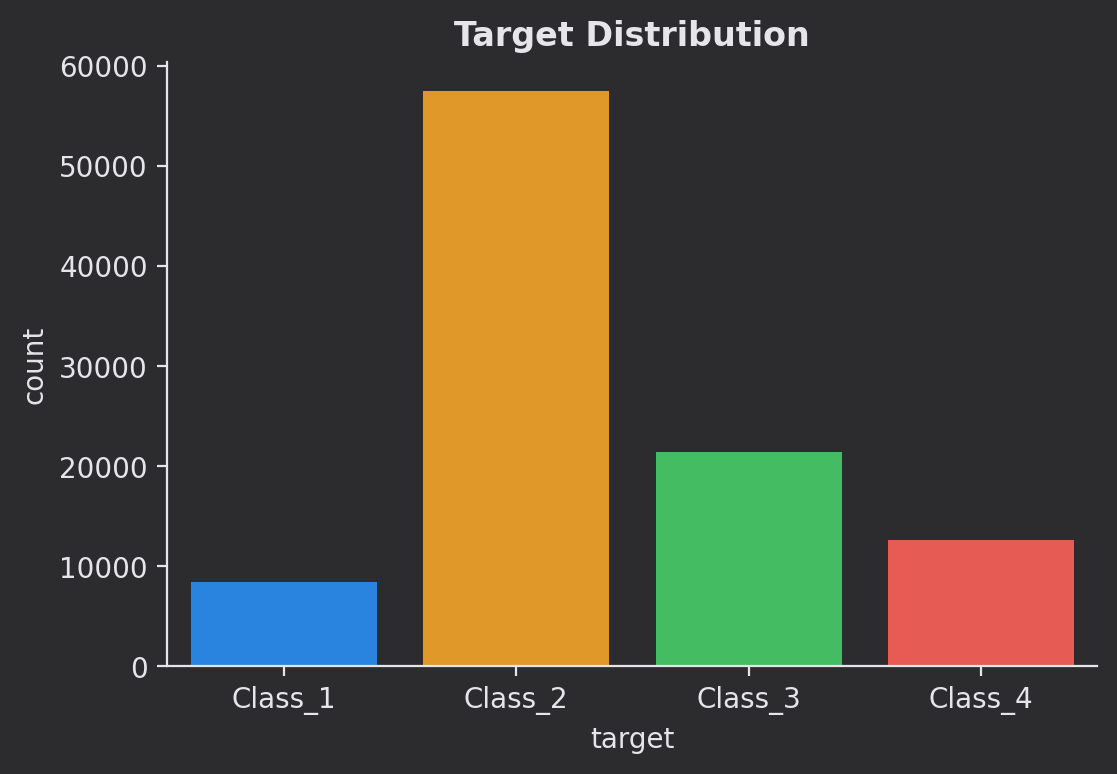

Class_2    57497
Class_3    21420
Class_4    12593
Class_1     8490
Name: target, dtype: int64

In [15]:
fig, ax = plt.subplots()
sns.countplot(x=train['target'],data=train, order=sorted(train['target'].unique()), ax=ax)
#ax.set_ylim(0, 63000)
ax.set_title('Target Distribution', weight='bold')
plt.show()
train['target'].value_counts()

## Train - Describe()

In [16]:
train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
id,100000.000000,49999.500000,28867.657797,0.000000,24999.750000,49999.500000,74999.250000,99999.000000
feature_0,100000.000000,0.257830,0.929033,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,100000.000000,0.431720,1.977862,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,100000.000000,0.114130,0.519584,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,100000.000000,0.590550,1.844558,0.000000,0.000000,0.000000,0.000000,26.000000
feature_4,100000.000000,0.599770,2.785531,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,0.160820,0.601149,0.000000,0.000000,0.000000,0.000000,10.000000
feature_6,100000.000000,0.731490,2.343465,0.000000,0.000000,0.000000,0.000000,27.000000
feature_7,100000.000000,1.228920,2.692732,0.000000,0.000000,0.000000,1.000000,31.000000
feature_8,100000.000000,0.903350,3.415258,0.000000,0.000000,0.000000,0.000000,39.000000


In [17]:
for  i in range(0,50):
    y = 'feature_{}'.format(i)
    y_min = train[y].min()
    y_max = train[y].max()
    print(y+" range is ({},{})".format(y_min,y_max))

feature_0 range is (0,10)
feature_1 range is (0,31)
feature_2 range is (0,6)
feature_3 range is (0,26)
feature_4 range is (0,38)
feature_5 range is (0,10)
feature_6 range is (0,27)
feature_7 range is (0,31)
feature_8 range is (0,39)
feature_9 range is (0,17)
feature_10 range is (0,16)
feature_11 range is (0,12)
feature_12 range is (0,11)
feature_13 range is (0,3)
feature_14 range is (0,51)
feature_15 range is (0,20)
feature_16 range is (0,19)
feature_17 range is (0,16)
feature_18 range is (0,13)
feature_19 range is (-2,55)
feature_20 range is (0,17)
feature_21 range is (0,36)
feature_22 range is (0,4)
feature_23 range is (0,19)
feature_24 range is (0,34)
feature_25 range is (0,23)
feature_26 range is (0,21)
feature_27 range is (0,31)
feature_28 range is (0,23)
feature_29 range is (0,13)
feature_30 range is (-1,41)
feature_31 range is (-1,46)
feature_32 range is (-2,27)
feature_33 range is (0,24)
feature_34 range is (0,25)
feature_35 range is (-2,43)
feature_36 range is (0,3)
feature_37

In [18]:
for  i in range(0,50):
    y = 'feature_{}'.format(i)
    y_min = test[y].min()
    y_max = test[y].max()
    print(y+" range is ({},{})".format(y_min,y_max))

feature_0 range is (0,10)
feature_1 range is (0,31)
feature_2 range is (0,6)
feature_3 range is (0,25)
feature_4 range is (0,38)
feature_5 range is (0,9)
feature_6 range is (0,25)
feature_7 range is (0,29)
feature_8 range is (0,35)
feature_9 range is (0,16)
feature_10 range is (0,15)
feature_11 range is (0,11)
feature_12 range is (0,11)
feature_13 range is (0,3)
feature_14 range is (-1,47)
feature_15 range is (0,19)
feature_16 range is (0,19)
feature_17 range is (0,16)
feature_18 range is (0,13)
feature_19 range is (-2,57)
feature_20 range is (0,17)
feature_21 range is (0,35)
feature_22 range is (0,4)
feature_23 range is (0,17)
feature_24 range is (0,36)
feature_25 range is (0,24)
feature_26 range is (0,21)
feature_27 range is (0,31)
feature_28 range is (0,22)
feature_29 range is (0,12)
feature_30 range is (-2,38)
feature_31 range is (-3,43)
feature_32 range is (-2,25)
feature_33 range is (0,23)
feature_34 range is (0,26)
feature_35 range is (0,41)
feature_36 range is (0,3)
feature_37 

## Test - Describe()

In [19]:
test.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
id,50000.000000,124999.500000,14433.901067,100000.000000,112499.750000,124999.500000,137499.250000,149999.000000
feature_0,50000.000000,0.254620,0.910607,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,50000.000000,0.443480,2.004536,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,50000.000000,0.116720,0.524807,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,50000.000000,0.584440,1.814083,0.000000,0.000000,0.000000,0.000000,25.000000
feature_4,50000.000000,0.612640,2.819580,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,50000.000000,0.161500,0.605760,0.000000,0.000000,0.000000,0.000000,9.000000
feature_6,50000.000000,0.746000,2.352495,0.000000,0.000000,0.000000,0.000000,25.000000
feature_7,50000.000000,1.238040,2.728055,0.000000,0.000000,0.000000,1.000000,29.000000
feature_8,50000.000000,0.886440,3.364154,0.000000,0.000000,0.000000,0.000000,35.000000


## Check Statistics in train and test

In [20]:
def diff_color(x):
    color = 'red' if x<0 else ('green' if x > 0 else 'black')
    return f'color: {color}'

In [21]:
(train.describe() - test.describe())[test.columns].T.iloc[1:,1:].style\
        .bar(subset=['mean', 'std'], align='mid', color=['#d65f5f', '#5fba7d'])\
        .applymap(diff_color, subset=['min', 'max'])

,mean,std,min,25%,50%,75%,max
feature_0,0.003210,0.018426,0.000000,0.000000,0.000000,0.000000,0.000000
feature_1,-0.011760,-0.026675,0.000000,0.000000,0.000000,0.000000,0.000000
feature_2,-0.002590,-0.005223,0.000000,0.000000,0.000000,0.000000,0.000000
feature_3,0.006110,0.030476,0.000000,0.000000,0.000000,0.000000,1.000000
feature_4,-0.012870,-0.034049,0.000000,0.000000,0.000000,0.000000,0.000000
feature_5,-0.000680,-0.004611,0.000000,0.000000,0.000000,0.000000,1.000000
feature_6,-0.014510,-0.009031,0.000000,0.000000,0.000000,0.000000,2.000000
feature_7,-0.009120,-0.035323,0.000000,0.000000,0.000000,0.000000,2.000000
feature_8,0.016910,0.051104,0.000000,0.000000,0.000000,0.000000,4.000000
feature_9,-0.001800,-0.009186,0.000000,0.000000,0.000000,0.000000,1.000000


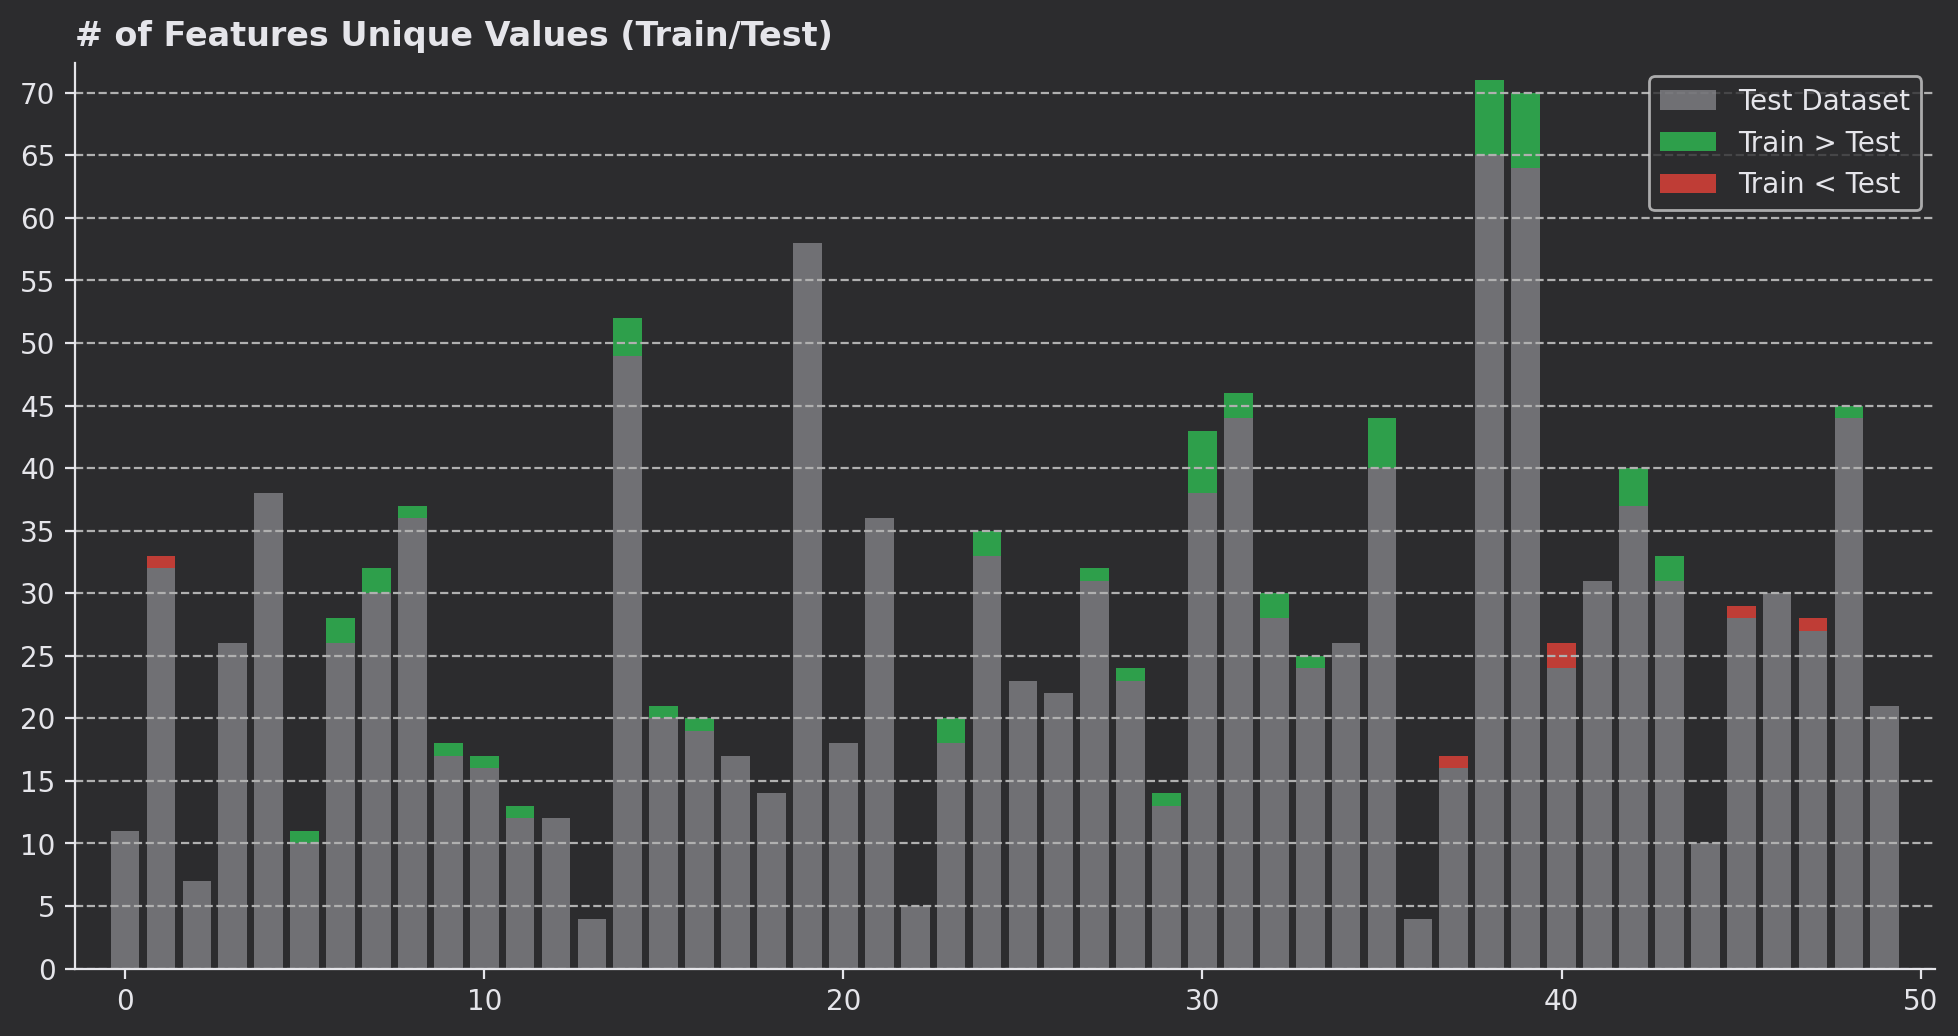

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

y = np.array([train[f'feature_{i}'].nunique() for i in range(50)])
y2 = np.array([test[f'feature_{i}'].nunique() for i in range(50)])
comp = y-y2


ax.bar(range(50), y2, alpha=0.7, color=gray_dark_palette[0], label='Test Dataset')
ax.bar(range(50),  comp*(comp>0), bottom=y2, color=dark_palette[2], alpha=0.7, label='Train > Test')
ax.bar(range(50), comp*(comp<0), bottom=y2-comp*(comp<0), color=dark_palette[3], alpha=0.7, label='Train < Test')

ax.set_yticks(range(0, 80, 5))
ax.margins(0.02)
ax.grid(axis='y', linestyle='--', zorder=5)
ax.set_title('# of Features Unique Values (Train/Test)', loc='left', fontweight='bold')
ax.legend()
plt.show()

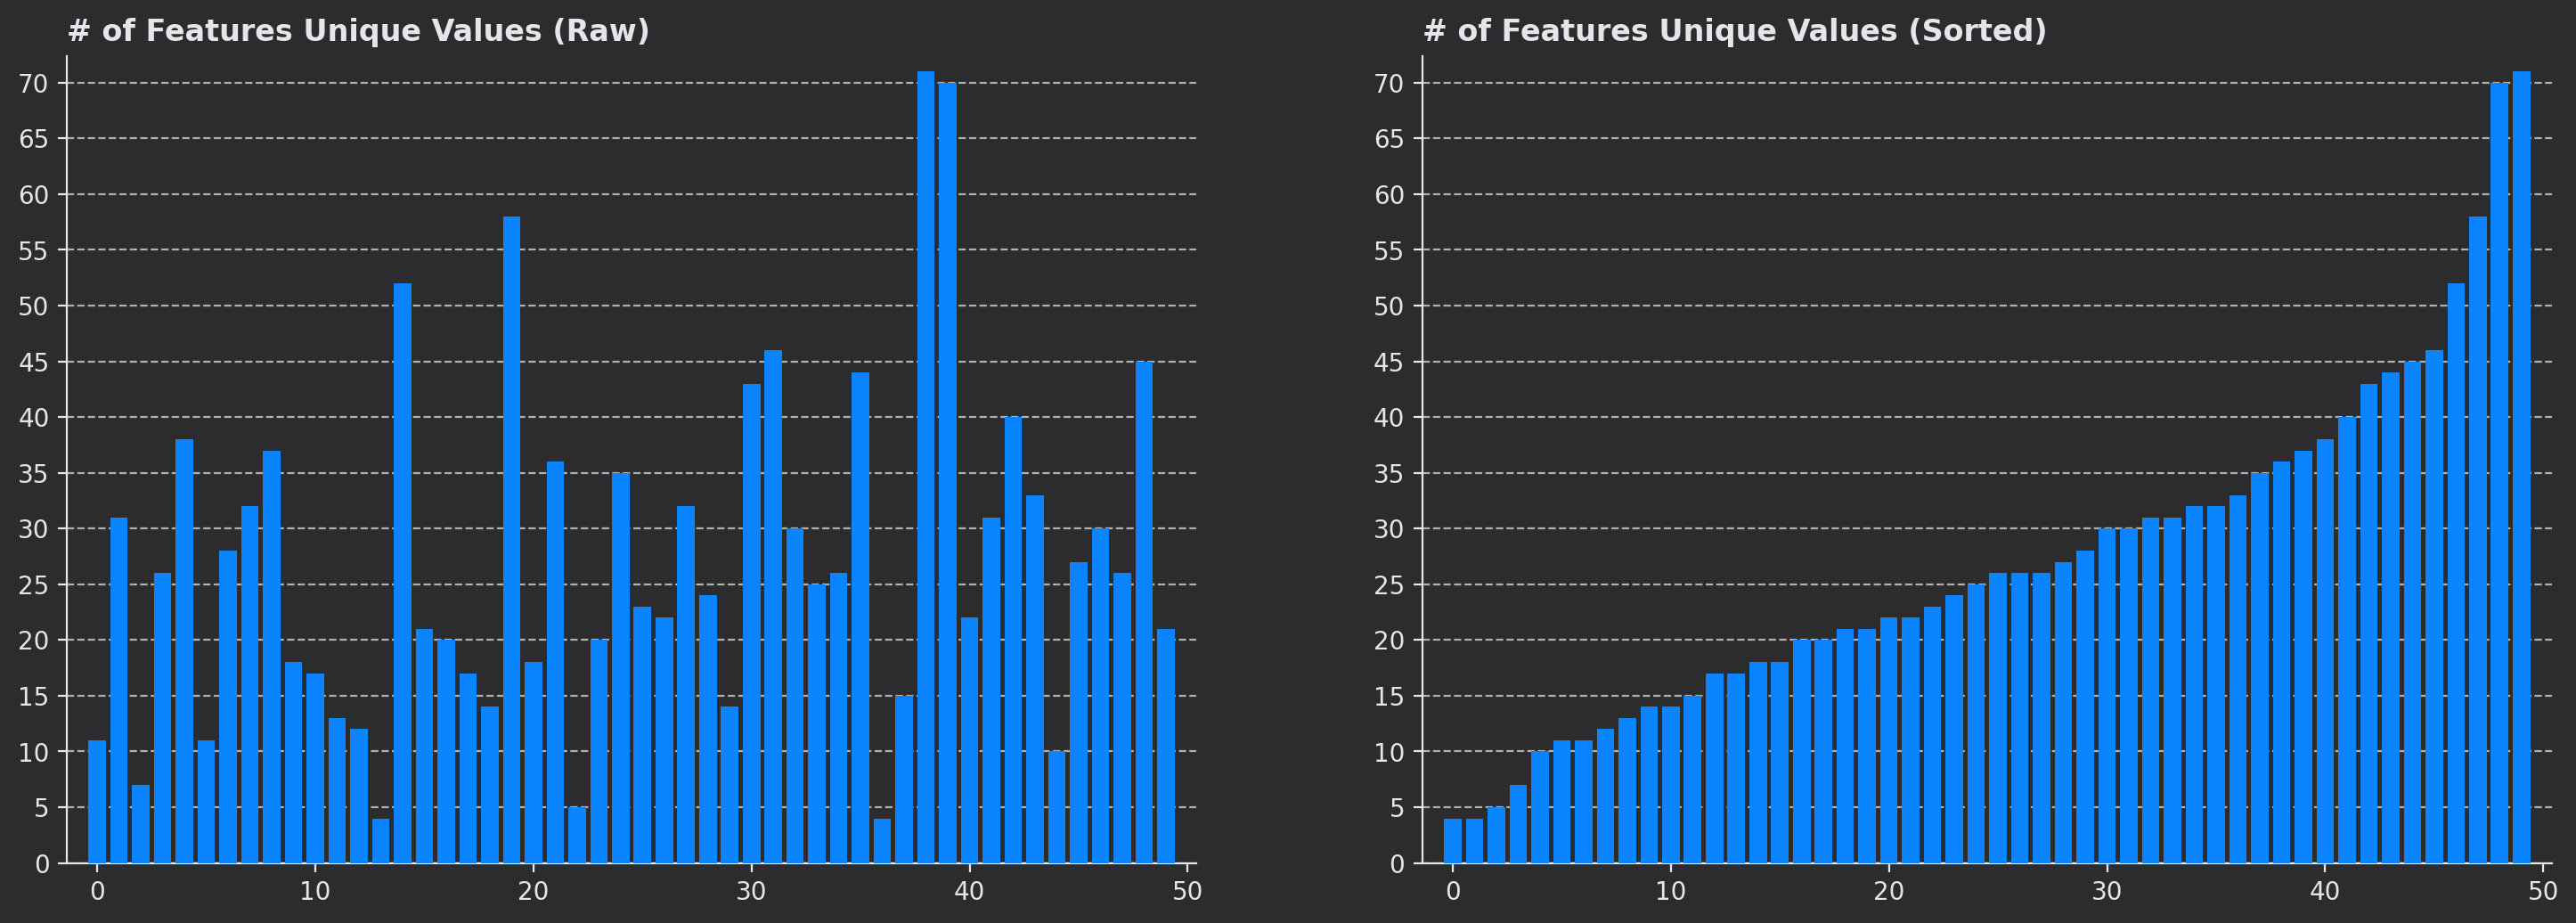

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

y = [train[f'feature_{i}'].nunique() for i in range(50)]

for ax in axes:
    ax.bar(range(50), y, zorder=10)
    ax.set_yticks(range(0, 80, 5))
    ax.margins(0.02)
    ax.grid(axis='y', linestyle='--', zorder=5)
    y.sort()

axes[0].set_title('# of Features Unique Values (Raw)', loc='left', fontweight='bold')
axes[1].set_title('# of Features Unique Values (Sorted)', loc='left', fontweight='bold')

plt.show()

NameError: name 'target_class' is not defined

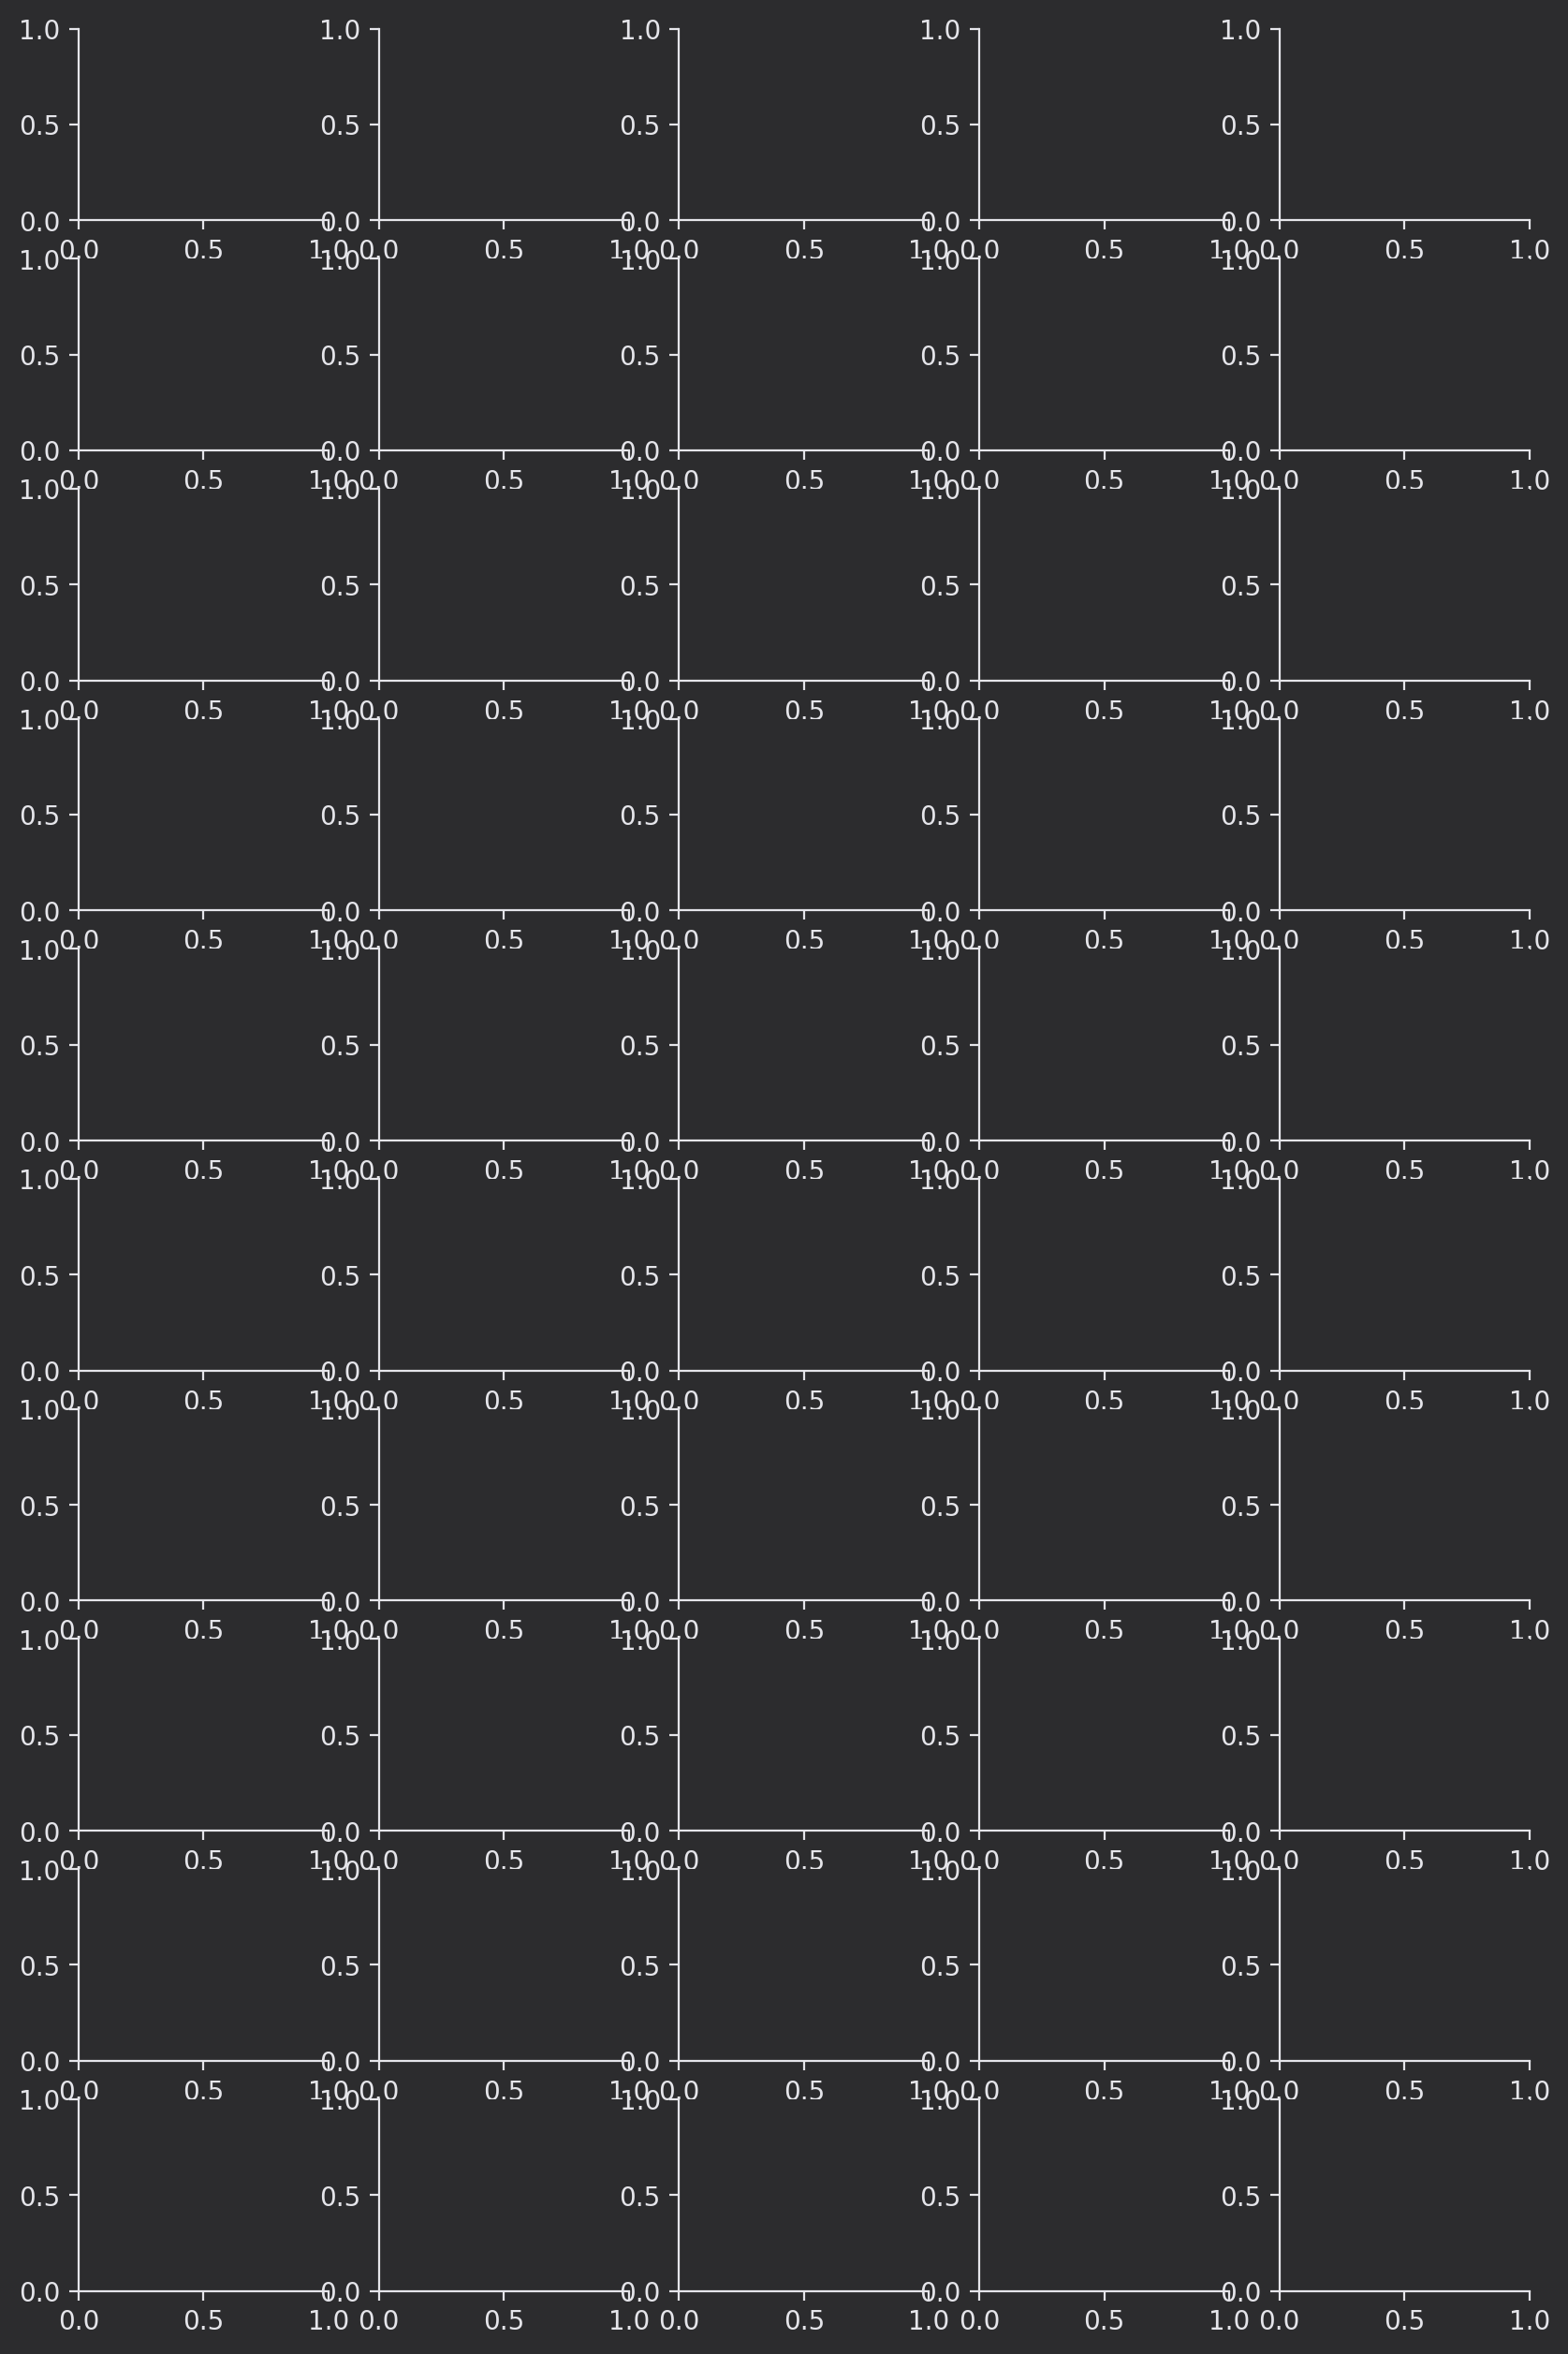

In [24]:
fig, axes = plt.subplots(10, 5, figsize=(10, 16))

for idx, ax in zip(range(50), axes.flatten()):
    cnt = train[f'feature_{idx}'].value_counts().sort_index()
    sns.kdeplot(x=f'feature_{idx}', 
                hue='target', hue_order=target_class,
                data=train,
                alpha=0.5, 
                linewidth=0.6, fill=True,
                legend=False,
                ax=ax)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    cnt = len(train[f'feature_{idx}'].unique())
    ax.set_title(f'Feature_{idx}({cnt})', loc='right', weight='bold', fontsize=11)

axes.flatten()[-1].axis('off')    
axes.flatten()[-2].axis('off')

fig.supxlabel('Distribution by class (by feature)', ha='center', fontweight='bold')

#f.delaxes(axes[19, 1])
fig.tight_layout()
plt.show()

In [25]:
zero_data = ((train.iloc[:,:50]==0).sum() / len(train_df) * 100)[::-1]
fig, ax = plt.subplots(1,1,figsize=(10, 19))

ax.barh(zero_data.index, 100, color='#dadada', height=0.6)
barh = ax.barh(zero_data.index, zero_data, color=light_palette[1], height=0.6)
ax.bar_label(barh, fmt='%.01f %%', color='black')
ax.spines[['left', 'bottom']].set_visible(False)

ax.set_xticks([])

ax.set_title('# of Zeros (by feature)', loc='center', fontweight='bold', fontsize=15)    
plt.show()

NameError: name 'train_df' is not defined

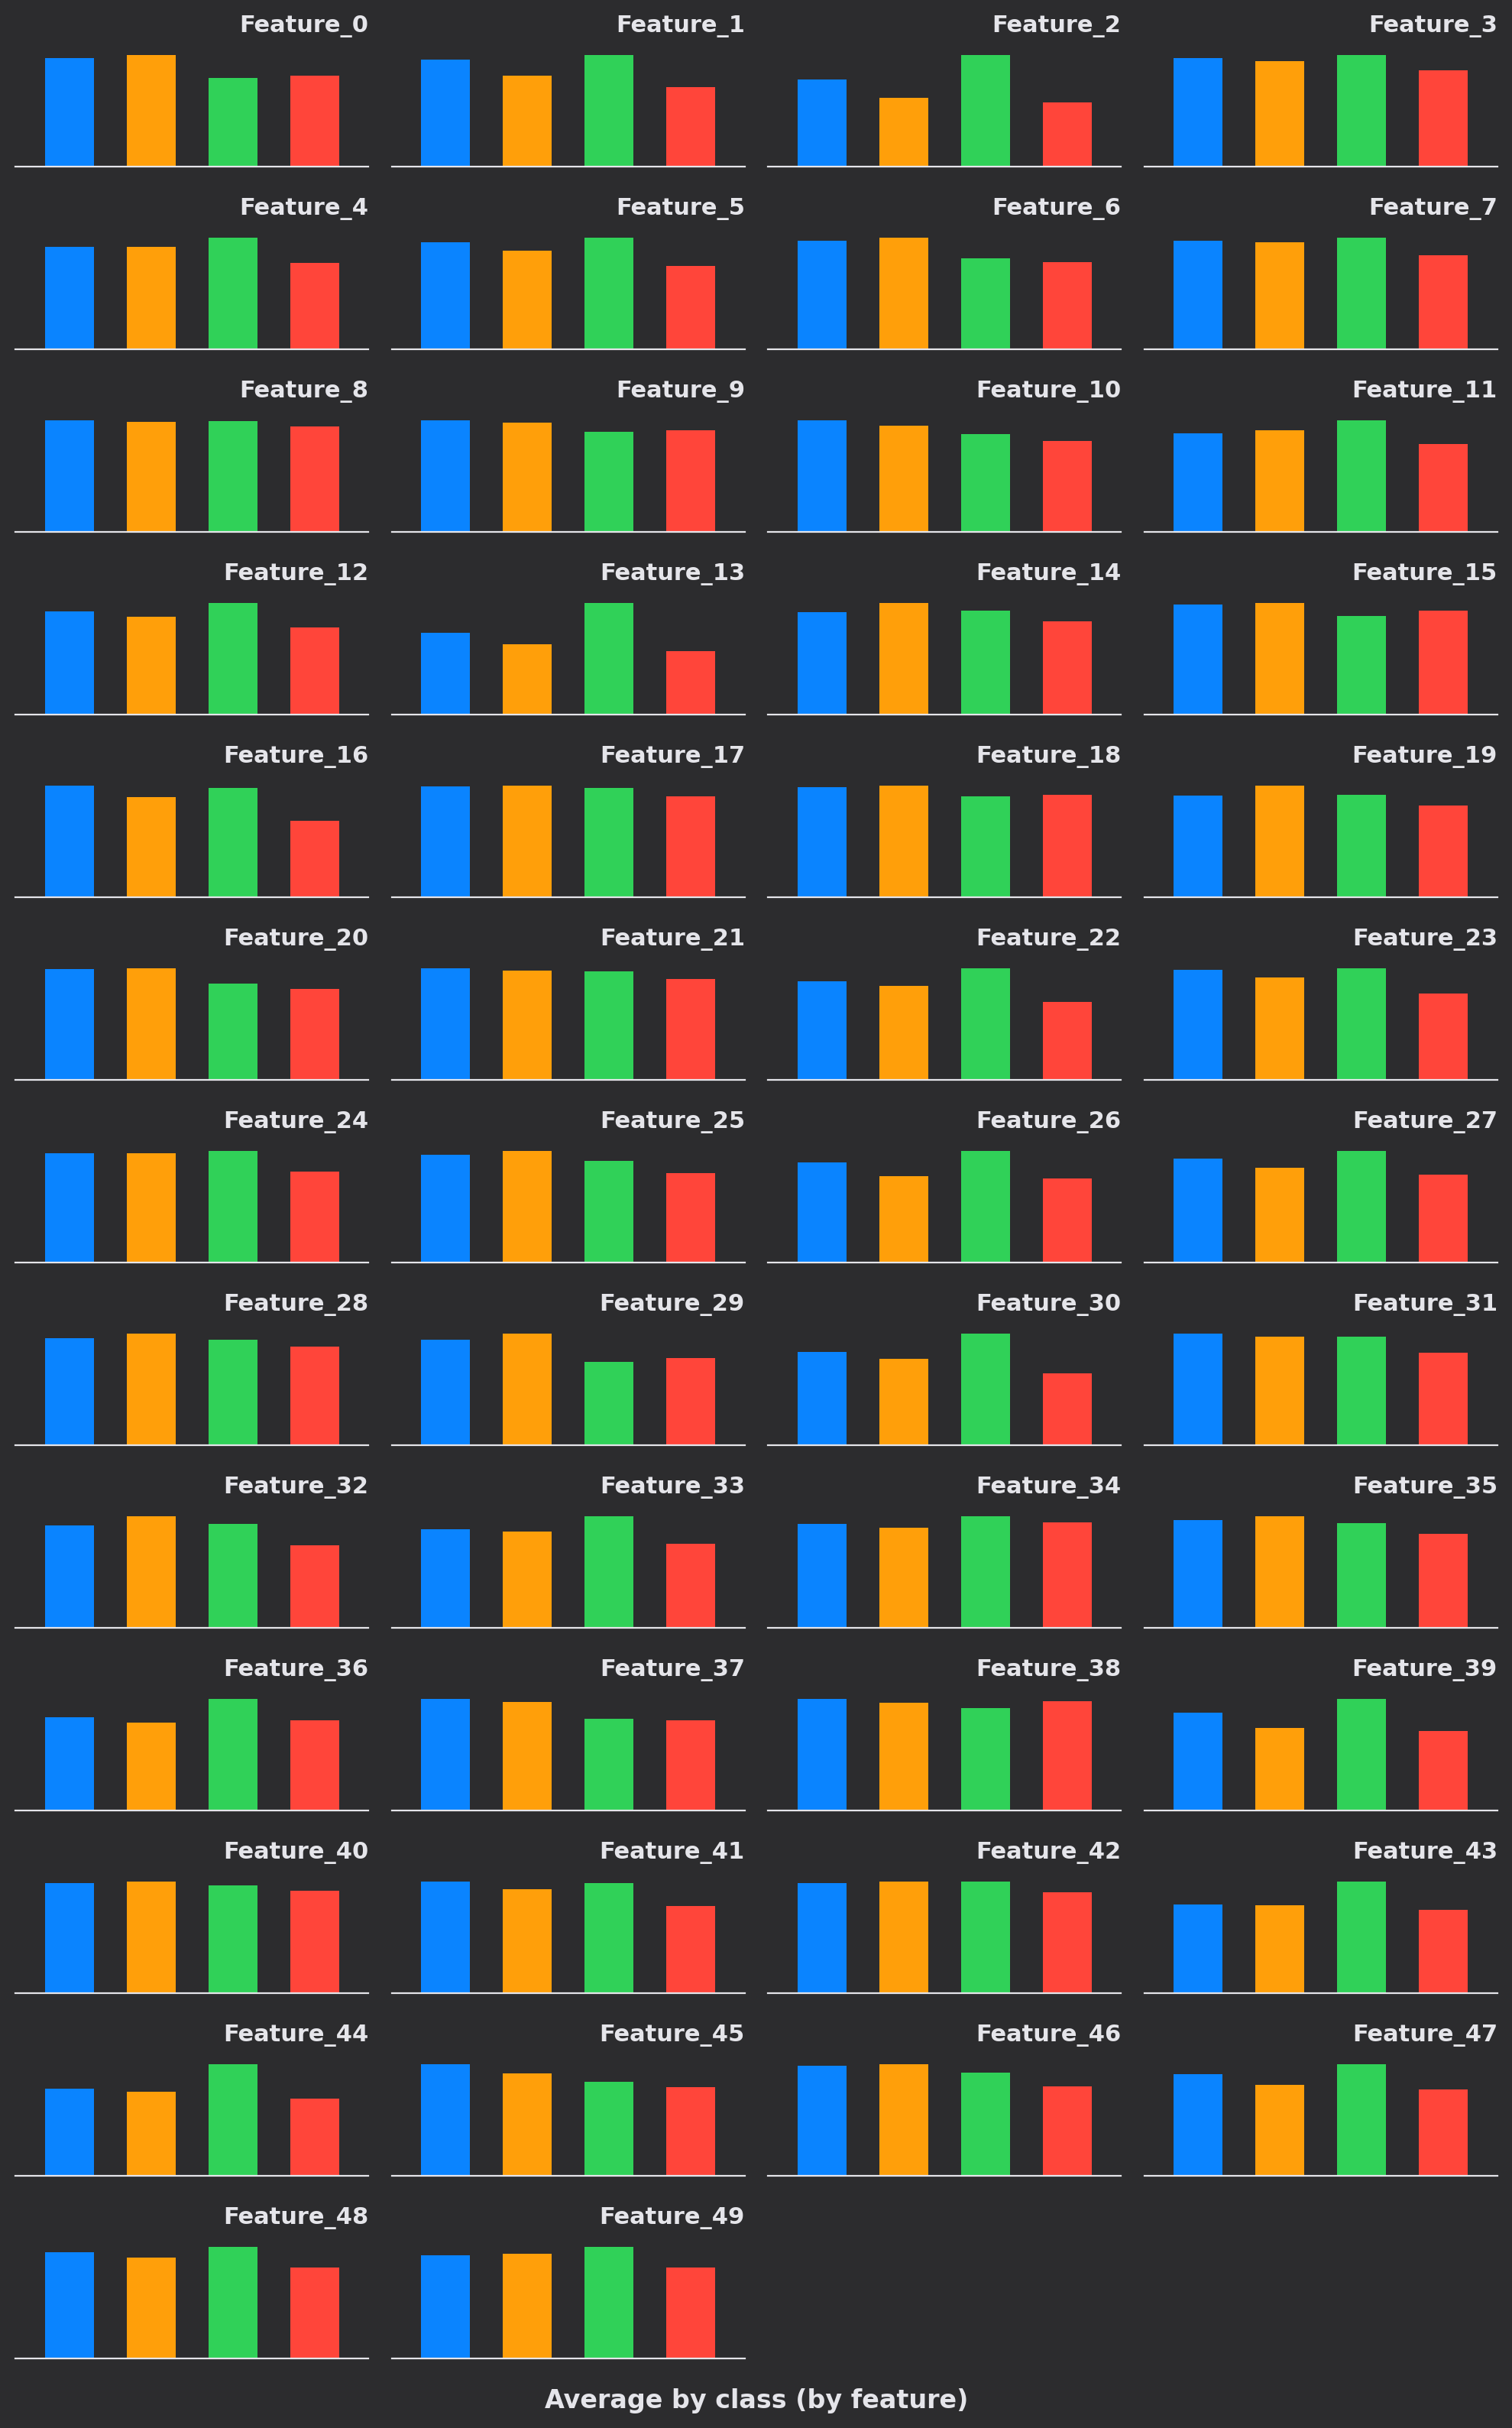

In [26]:
fig, axes = plt.subplots(13, 4, figsize=(10, 16))

mean = train.groupby('target').mean().sort_index()
std = train.groupby('target').std().sort_index()

for idx, ax in zip(range(50), axes.flatten()):
    ax.bar(mean[f'feature_{idx}'].index, mean[f'feature_{idx}'], 
           color=dark_palette[:4], width=0.6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.margins(0.1)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'Feature_{idx}', loc='right', weight='bold', fontsize=11)

axes.flatten()[-1].axis('off')    
axes.flatten()[-2].axis('off')

fig.supxlabel('Average by class (by feature)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

## Correlation

In [27]:
corr = train[features].corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(14, 14))

#plot heatmap
sns.heatmap(corr,
            square=True, center=0, linewidth=0.2,
            cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask, ax=ax) 

# yticks
ax.set_title('Correlation of features', loc='left', fontweight='bold')
plt.show()

NameError: name 'features' is not defined

Most features are weak correlations - `0.14` or `less`.

# Class distribution visualization with t-SNE

In [28]:
%%time
import sys
!cp ../input/rapids/rapids.0.19.0 /opt/conda/envs/rapids.tar.gz
!cd /opt/conda/envs/ && tar -xzvf rapids.tar.gz > /dev/null
sys.path = ["/opt/conda/envs/rapids/lib/python3.7/site-packages"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib/python3.7"] + sys.path
sys.path = ["/opt/conda/envs/rapids/lib"] + sys.path 
!cp /opt/conda/envs/rapids/lib/libxgboost.so /opt/conda/lib/

CPU times: user 1.71 s, sys: 348 ms, total: 2.06 s
Wall time: 1min 34s


In [29]:
import cuml

from cuml.manifold import TSNE
import sklearn.manifold as tsne_sklearn
print('cuML version',cuml.__version__)

ImportError: CuPy is not correctly installed.

If you are using wheel distribution (cupy-cudaXX), make sure that the version of CuPy you installed matches with the version of CUDA on your host.
Also, confirm that only one CuPy package is installed:
  $ pip freeze

If you are building CuPy from source, please check your environment, uninstall CuPy and reinstall it with:
  $ pip install cupy --no-cache-dir -vvvv

Check the Installation Guide for details:
  https://docs.cupy.dev/en/latest/install.html

original error: libcuda.so.1: cannot open shared object file: No such file or directory

In [30]:
y = np.array( [int(v.split('_')[1]) for v in train_df.target.values ] )
train.drop( ['id','target'], inplace=True, axis=1 )

NameError: name 'train_df' is not defined

In [31]:
%%time
tsne = TSNE(n_components=2, perplexity=30, random_state=2021)
train_2D_rapids = tsne.fit_transform( train.values )

NameError: name 'TSNE' is not defined

In [32]:
plt.scatter(train_2D_rapids[:,0], train_2D_rapids[:,1], c=y, s=0.5)

NameError: name 'train_2D_rapids' is not defined

In [33]:
for i in range(5,50,5):
    tsne = TSNE(n_components=2, perplexity=i)
    train_2D = tsne.fit_transform(train)
    plt.title(f"perplexity: {i}")
    plt.scatter(train_2D[:,0], train_2D[:,1], c=y, s=0.5)
    plt.show()

NameError: name 'TSNE' is not defined

The class distribution seems very mixed.

# References
- https://www.kaggle.com/subinium/tps-may-categorical-eda
- https://www.kaggle.com/titericz/t-sne-visualization-with-rapids